# Image Compression by K-means clustering

In this exercise, you have to perform an image compression of the given picture of New York (New York.jpeg).

To do so, we want to keep not all the possible colors, but only 4.

Thus, you have to perform a clustering algorithm, with K=4, and show the image with those only 4 colors.

```
🔦 Hint:: An image is composed of pixels. Each pixel is made of 3 channels: Red, Green, Blue (RGB). Those color levels are encoded on 8 bits, meaning they are in the range [0-255]. For example, a pixel with this RGB color : (0, 0, 255) will be a very strong blue pixel.

```

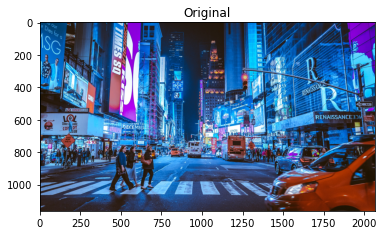

In [13]:
%matplotlib inline
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load image and convert to RGB for cv2
path = 'New York.jpeg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Normalise pixel values
image = image / 255.0

# Display original image
plt.title('Original')
plt.imshow(image)
plt.show()

In [14]:
# Reshape image into 2D array, display array values
height, width, channels = image.shape
image_2D = image.reshape(height * width, channels)
print(image_2D)

[[0.00784314 0.25490196 0.42745098]
 [0.00784314 0.25490196 0.42745098]
 [0.00392157 0.25490196 0.43529412]
 ...
 [0.57254902 0.18431373 0.03137255]
 [0.56078431 0.17647059 0.02352941]
 [0.52941176 0.14509804 0.        ]]


In [15]:
# Apply KMeans with K = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(image_2D)

KMeans(n_clusters=4)

In [16]:
# Replace pixels, reshape and scale back to original dimensions
compressed_image_2D = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image_2D.reshape(height, width, channels) * 255.0, 0, 255).astype(np.uint8)

# Save the final image
output_path = 'New York Modified.jpeg'
cv2.imwrite(output_path, cv2.cvtColor(compressed_image, cv2.COLOR_RGB2BGR))

True

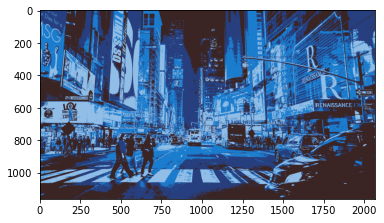

In [17]:
# Display result
plt.imshow(compressed_image/255.)
plt.show()